<a href="https://colab.research.google.com/github/nicha0524/DPDM2021/blob/main/Project_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#คาดการณ์การซื้อตามชนิดจักรยานต์โดยวิเคราะจากทวีปคู่ค้าและวันในสัปดาห์

##Preprocessing

###ขั้นที่ 1 ดึงข้อมูลจาก drive

In [1707]:
import pandas as pd

In [1708]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1709]:
import os # จัดการไฟล์และ path

##### ตารางที่ 1 Products (ใช้ข้อมูล PRODCATEGORYID)

In [1710]:
path = '/content/drive/My Drive/DPDM2021_DATA' #    เรียกข้อมูลจาก drive
Products= pd.read_csv(os.path.join(path,'Products.csv')) # read ข้อมูลจาก Excel โดยใช้ คำสั่ง  pd.read_csv
Products

,PRODUCTID,TYPECODE,PRODCATEGORYID,CREATEDBY,CREATEDAT,CHANGEDBY,CHANGEDAT,SUPPLIER_PARTNERID,TAXTARIFFCODE,QUANTITYUNIT,WEIGHTMEASURE,WEIGHTUNIT,CURRENCY,PRICE
0,RO-1001,PR,RO,9,20181003,9,20181003,100000000,1,EA,7.7,KG,USD,525
1,RO-1002,PR,RO,9,20181003,9,20181003,100000001,1,EA,8.0,KG,USD,689
2,RO-1003,PR,RO,12,20181003,12,20181003,100000002,1,EA,9.1,KG,USD,721
3,BX-1011,PR,BX,9,20181003,9,20181003,100000003,1,EA,11.1,KG,USD,249
4,BX-1012,PR,BX,6,20181003,6,20181003,100000004,1,EA,12.0,KG,USD,399
5,BX-1013,PR,BX,7,20181003,7,20181003,100000005,1,EA,13.1,KG,USD,449
6,BX-1014,PR,BX,11,20181003,11,20181003,100000006,1,EA,11.8,KG,USD,799
7,BX-1015,PR,BX,8,20181003,8,20181003,100000007,1,EA,12.5,KG,USD,299
8,BX-1016,PR,BX,11,20181003,11,20181003,100000008,1,EA,12.8,KG,USD,319
9,CC-1021,PR,CC,10,20181003,10,20181003,100000009,1,EA,8.1,KG,USD,1144


##### ตารางที่ 2 SalesOrderItems (ใช้ข้อมูล DELIVERYDATE)

In [1711]:
path = '/content/drive/My Drive/DPDM2021_DATA' #    เรียกข้อมูลจาก drive
SalesOrderItems= pd.read_csv(os.path.join(path,'SalesOrderItems.csv')) # read ข้อมูลจาก Excel โดยใช้ คำสั่ง  pd.read_csv
SalesOrderItems

,SALESORDERID,SALESORDERITEM,PRODUCTID,NOTEID,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,ITEMATPSTATUS,OPITEMPOS,QUANTITY,QUANTITYUNIT,DELIVERYDATE
0,500000000,10,MB-1034,,USD,2499,2186.625,312.375,I,NaN,4,EA,20180311
1,500000000,20,CB-1161,,USD,399,349.125,49.875,I,NaN,9,EA,20180311
2,500000001,10,HB-1175,,USD,899,786.625,112.375,I,NaN,2,EA,20180228
3,500000001,20,RC-1056,,USD,2499,2186.625,312.375,I,NaN,2,EA,20180228
4,500000001,30,CC-1021,,USD,1144,1001.000,143.000,I,NaN,3,EA,20180228
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,500000333,10,MB-1031,,USD,649,567.875,81.125,I,NaN,10,EA,20190709
1926,500000333,20,BX-1013,,USD,449,392.875,56.125,I,NaN,3,EA,20190709
1927,500000333,30,EB-1132,,USD,1900,1662.500,237.500,I,NaN,3,EA,20190709
1928,500000333,40,BX-1011,,USD,249,217.875,31.125,I,NaN,5,EA,20190709


##### ตารางที่ 3 SalesOrders (ใช้ข้อมูล SALESORG)

In [1712]:
path = '/content/drive/My Drive/DPDM2021_DATA' #    เรียกข้อมูลจาก drive
SalesOrders= pd.read_csv(os.path.join(path,'SalesOrders.csv')) # read ข้อมูลจาก Excel โดยใช้ คำสั่ง  pd.read_csv
SalesOrders

,SALESORDERID,CREATEDBY,CREATEDAT,CHANGEDBY,CHANGEDAT,FISCALYEARPERIOD,NOTEID,PARTNERID,SALESORG,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT
0,500000000,4,20180111,4,20180116,2018001,NaN,100000022,APJ,USD,13587,11888.625,1698.375
1,500000001,2,20180112,2,20180115,2018001,NaN,100000026,EMEA,USD,12622,11044.250,1577.750
2,500000002,5,20180115,5,20180120,2018001,NaN,100000018,APJ,USD,45655,39948.125,5706.875
3,500000003,3,20180115,3,20180120,2018001,NaN,100000009,EMEA,USD,101786,89062.750,12723.250
4,500000004,8,20180116,8,20180117,2018001,NaN,100000025,EMEA,USD,71684,62723.500,8960.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,500000329,7,20190619,7,20190620,2019006,NaN,100000031,AMER,USD,90621,79293.375,11327.625
330,500000330,11,20190622,11,20190626,2019006,NaN,100000000,AMER,USD,113871,99637.125,14233.875
331,500000331,3,20190625,3,20190626,2019006,NaN,100000009,EMEA,USD,12693,11106.375,1586.625
332,500000332,13,20190627,13,20190701,2019006,NaN,100000034,AMER,USD,70528,61712.000,8816.000


###ขั้นที่ 2 เชื่อมตาราง โดยใช้ตาราง SalesOrderItems เป็นตารางหลัก


##### เชื่อมตาราง SalesOrderItems และ Products  โดยใช้ PRODUCTID เป็นคีย์ เพื่อ map ข้อมูล PRODCATEGORYID (ชื่อชนิดสินค้า)

In [1713]:
SalesOrderItems['name_product'] = SalesOrderItems['PRODUCTID'].map(Products.set_index('PRODUCTID')['PRODCATEGORYID']) 
SalesOrderItems

,SALESORDERID,SALESORDERITEM,PRODUCTID,NOTEID,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,ITEMATPSTATUS,OPITEMPOS,QUANTITY,QUANTITYUNIT,DELIVERYDATE,name_product
0,500000000,10,MB-1034,,USD,2499,2186.625,312.375,I,NaN,4,EA,20180311,MB
1,500000000,20,CB-1161,,USD,399,349.125,49.875,I,NaN,9,EA,20180311,CB
2,500000001,10,HB-1175,,USD,899,786.625,112.375,I,NaN,2,EA,20180228,HB
3,500000001,20,RC-1056,,USD,2499,2186.625,312.375,I,NaN,2,EA,20180228,RC
4,500000001,30,CC-1021,,USD,1144,1001.000,143.000,I,NaN,3,EA,20180228,CC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,500000333,10,MB-1031,,USD,649,567.875,81.125,I,NaN,10,EA,20190709,MB
1926,500000333,20,BX-1013,,USD,449,392.875,56.125,I,NaN,3,EA,20190709,BX
1927,500000333,30,EB-1132,,USD,1900,1662.500,237.500,I,NaN,3,EA,20190709,EB
1928,500000333,40,BX-1011,,USD,249,217.875,31.125,I,NaN,5,EA,20190709,BX


##### เชื่อมตาราง SalesOrderItems และ SalesOrders โดยใช้ SALEORDERID เป็นคีย์ เพื่อ map ข้อมูล SALESORG (ทวีปที่ตั้งขององค์กรคู่ค้า (partner))

In [1714]:
SalesOrderItems['Region'] = SalesOrderItems['SALESORDERID'].map(SalesOrders.set_index('SALESORDERID')['SALESORG']) 
SalesOrderItems

,SALESORDERID,SALESORDERITEM,PRODUCTID,NOTEID,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,ITEMATPSTATUS,OPITEMPOS,QUANTITY,QUANTITYUNIT,DELIVERYDATE,name_product,Region
0,500000000,10,MB-1034,,USD,2499,2186.625,312.375,I,NaN,4,EA,20180311,MB,APJ
1,500000000,20,CB-1161,,USD,399,349.125,49.875,I,NaN,9,EA,20180311,CB,APJ
2,500000001,10,HB-1175,,USD,899,786.625,112.375,I,NaN,2,EA,20180228,HB,EMEA
3,500000001,20,RC-1056,,USD,2499,2186.625,312.375,I,NaN,2,EA,20180228,RC,EMEA
4,500000001,30,CC-1021,,USD,1144,1001.000,143.000,I,NaN,3,EA,20180228,CC,EMEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,500000333,10,MB-1031,,USD,649,567.875,81.125,I,NaN,10,EA,20190709,MB,APJ
1926,500000333,20,BX-1013,,USD,449,392.875,56.125,I,NaN,3,EA,20190709,BX,APJ
1927,500000333,30,EB-1132,,USD,1900,1662.500,237.500,I,NaN,3,EA,20190709,EB,APJ
1928,500000333,40,BX-1011,,USD,249,217.875,31.125,I,NaN,5,EA,20190709,BX,APJ


#####แปลงข้อมูล ทวีปเป็นตัวเลข

In [1715]:
 dw_mapping={'APJ':1, 'EMEA':2, 'AMER':3}
SalesOrderItems['Name_Region']=SalesOrderItems['Region'].map(dw_mapping)

###ขั้นตอนที่ 3 จัดการข้อมูลวันที่

In [1716]:
set(SalesOrderItems['DELIVERYDATE']) #ดูว่ามีวันแปลกๆหรือไม่

{20180223,
 20180225,
 20180228,
 20180301,
 20180305,
 20180307,
 20180308,
 20180309,
 20180311,
 20180314,
 20180315,
 20180317,
 20180321,
 20180322,
 20180323,
 20180325,
 20180328,
 20180330,
 20180401,
 20180402,
 20180403,
 20180408,
 20180411,
 20180412,
 20180414,
 20180419,
 20180420,
 20180421,
 20180424,
 20180425,
 20180429,
 20180430,
 20180501,
 20180503,
 20180504,
 20180505,
 20180507,
 20180508,
 20180511,
 20180512,
 20180518,
 20180527,
 20180528,
 20180529,
 20180530,
 20180531,
 20180601,
 20180604,
 20180606,
 20180608,
 20180612,
 20180617,
 20180618,
 20180620,
 20180621,
 20180622,
 20180627,
 20180701,
 20180703,
 20180706,
 20180708,
 20180709,
 20180712,
 20180713,
 20180715,
 20180716,
 20180718,
 20180719,
 20180720,
 20180721,
 20180729,
 20180730,
 20180731,
 20180801,
 20180803,
 20180806,
 20180807,
 20180808,
 20180809,
 20180810,
 20180811,
 20180820,
 20180822,
 20180823,
 20180824,
 20180828,
 20180829,
 20180902,
 20180903,
 20180906,
 20180908,

##### พบว่ามีวันที่ ที่มี ปี ค.ศ. ผิด จึงแปลงเป็นปี 2019 เนื่องจาก มีเพียง 2 ปี (2018-2019) ปี 2999 จึงน่าจะเป็นปี 2019

In [1717]:
A=SalesOrderItems[SalesOrderItems['DELIVERYDATE']==29991212] #เลือกเฉพาะ 29991212 ที่ปี ค.ศ.ผิด

In [1718]:
A['DELIVERYDATE']=int(20191212) # แทนปี 20191212 แทนปี 29991212

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1719]:
A # ดูข้อมูล

,SALESORDERID,SALESORDERITEM,PRODUCTID,NOTEID,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,ITEMATPSTATUS,OPITEMPOS,QUANTITY,QUANTITYUNIT,DELIVERYDATE,name_product,Region,Name_Region
618,500000112,10,HB-1173,,USD,649,567.875,81.125,I,NaN,10,EA,20191212,HB,APJ,1
619,500000112,20,DB-1082,,USD,1250,1093.750,156.250,I,NaN,7,EA,20191212,DB,APJ,1
620,500000112,30,BX-1013,,USD,449,392.875,56.125,I,NaN,5,EA,20191212,BX,APJ,1
621,500000112,40,DB-1082,,USD,1250,1093.750,156.250,I,NaN,5,EA,20191212,DB,APJ,1
622,500000112,50,RC-1054,,USD,5499,4811.625,687.375,I,NaN,2,EA,20191212,RC,APJ,1
623,500000112,60,MB-1033,,USD,3999,3499.125,499.875,I,NaN,4,EA,20191212,MB,APJ,1
624,500000112,70,CB-1163,,USD,288,252.000,36.000,I,NaN,7,EA,20191212,CB,APJ,1
625,500000112,80,EB-1134,,USD,4800,4200.000,600.000,I,NaN,1,EA,20191212,EB,APJ,1
626,500000112,90,CC-1023,,USD,1361,1190.875,170.125,I,NaN,3,EA,20191212,CC,APJ,1
627,500000112,100,CB-1163,,USD,288,252.000,36.000,I,NaN,2,EA,20191212,CB,APJ,1


In [1720]:
Sales_OrderItems=SalesOrderItems[SalesOrderItems['DELIVERYDATE']<29991212] #เลือกข้อมูลมีปีน้อยกว่า 2999

In [1721]:
Sale= pd.concat([Sales_OrderItems,A]) # ต่อตาราง A ที่แปลง ค.ศ.แล้ว กับตาราง Sales_OrderItems ที่ตัดปีที่ผิดแล้ว โดยตั้งชื่อตารางใหม่ว่า "Sale"

##### แปลงวันที่เป็น datetime

In [1722]:
import pandas as pd # เรียกใช้คำสั่ง panda

In [1723]:
Sale['DATE']=pd.to_datetime(Sale['DELIVERYDATE'], format='%Y%m%d') #สร้างคอลัมน์ใหม่ 'DATE' เพื่อใช้เก็บข้อมูลวันที่ ที่แปลงแล้ว

In [1724]:
Sale #เรียกดูตาราง

,SALESORDERID,SALESORDERITEM,PRODUCTID,NOTEID,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,ITEMATPSTATUS,OPITEMPOS,QUANTITY,QUANTITYUNIT,DELIVERYDATE,name_product,Region,Name_Region,DATE
0,500000000,10,MB-1034,,USD,2499,2186.625,312.375,I,NaN,4,EA,20180311,MB,APJ,1,2018-03-11
1,500000000,20,CB-1161,,USD,399,349.125,49.875,I,NaN,9,EA,20180311,CB,APJ,1,2018-03-11
2,500000001,10,HB-1175,,USD,899,786.625,112.375,I,NaN,2,EA,20180228,HB,EMEA,2,2018-02-28
3,500000001,20,RC-1056,,USD,2499,2186.625,312.375,I,NaN,2,EA,20180228,RC,EMEA,2,2018-02-28
4,500000001,30,CC-1021,,USD,1144,1001.000,143.000,I,NaN,3,EA,20180228,CC,EMEA,2,2018-02-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,500000308,40,CC-1023,,USD,1361,1190.875,170.125,I,NaN,3,EA,20191212,CC,AMER,3,2019-12-12
1788,500000308,50,MB-1033,,USD,3999,3499.125,499.875,I,NaN,5,EA,20191212,MB,AMER,3,2019-12-12
1789,500000308,60,CC-1023,,USD,1361,1190.875,170.125,I,NaN,8,EA,20191212,CC,AMER,3,2019-12-12
1790,500000308,70,EB-1137,,USD,7900,6912.500,987.500,I,NaN,8,EA,20191212,EB,AMER,3,2019-12-12


####เพิ่มคอลัมน์วันในสัปดาห์ โดยแปลงจากคอลัมน์ DATE โดย
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'


In [1725]:
Sale['weekday']=Sale['DATE'].dt.weekday

In [1726]:
set(Sale['weekday'])

{0, 1, 2, 3, 4, 5, 6}

###ขั้นที่ 4 ดูข้อมูลว่ามีวันที่ซ้ำกันหรือไม่ ในแต่ละยี่ห้อรถจักยานต์(ถ้ามีเลือกเฉพาะวันที่ที่มีคำสังซื้อ (SALESORDERITEM) เยอะที่สุด)




####4.1 เพิ่่มคอลัมน์ ปี ค.ศ. เดือน และ วัน เพื่อใช้เรียกดูข้อมูล

In [1727]:
Sale['day']=Sale['DATE'].dt.day #วันที่

In [1728]:
Sale['mount']=Sale['DATE'].dt.month  # เดือน

In [1729]:
Sale['year']=Sale['DATE'].dt.year #ปี

####4.2 รถจักยานต์ชนิด Road Bike:RO

In [1730]:
RO=Sale[Sale['name_product']=='RO']

#####4.2.1 ดูข้อมูลในแต่ละทวีป

In [1731]:
set(RO['Region'])

{'AMER', 'APJ', 'EMEA'}

######1) Region:America

In [1732]:
RO_AMER=RO[RO['Region']=='AMER'] #ทวีป America

######เรียกดูข้อมูลปี 2018 

In [1733]:
RO_AMER_2018=RO_AMER[RO_AMER['year']==2018]

In [1734]:
set(RO_AMER_2018['mount']) ## ไม่มีข้อมูลคำสั่งซื้อในเดือน มกราคม กุมภาพันธ์ และธันวาคม

{3, 4, 5, 6, 7, 8, 9, 10, 11}

###### เรียกดูข้อมูลปี 2018 ในเดือนต่างๆ

######เดือนมีนาคม

In [1735]:
RO_AMER_2018_3=RO_AMER_2018[RO_AMER_2018['mount']==3].sort_values(by='day').drop(68) #พบว่ามีวันที่ 21 มีนาคม สั่งสินค้าซ้ำกัน จึงตัดแถวที่มีจำนวนคำสังซื้อน้อยกว่าทิ้งคือแถว 68

######เดือนเมษายน

In [1736]:
RO_AMER_2018_4=RO_AMER_2018[RO_AMER_2018['mount']==4].sort_values(by='day') #ไม่มีวันที่ ที่มีคำสั่งซื้อซ้ำ

######เดือนพฤษภาคม

In [1737]:
RO_AMER_2018_5=RO_AMER_2018[RO_AMER_2018['mount']==5].sort_values(by='day') #ไม่มีวันที่ ที่มีคำสั่งซื้อซ้ำ

######เดือนมิถุนายน

In [1738]:
RO_AMER_2018_6=RO_AMER_2018[RO_AMER_2018['mount']==6].sort_values(by='day') #ไม่มีวันที่ ที่มีคำสั่งซื้อซ้ำ

######เดือนกรกฎาคม

In [1739]:
RO_AMER_2018_7=RO_AMER_2018[RO_AMER_2018['mount']==7].sort_values(by='day').drop([429,560]) #ไ#พบว่ามีวันที่ 18  และ31  มีกรกฎาคม มีสั่งสินค้าซ้ำกัน จึงตัดแถวที่มีจำนวนคำสังซื้อน้อยกว่าทิ้งคือแถว 429 และ 560

######เดือนสิงหาคม

In [1740]:
RO_AMER_2018_8=RO_AMER_2018[RO_AMER_2018['mount']==8].sort_values(by='day') #ไม่มีวันที่ ที่มีคำสั่งซื้อซ้ำ

######เดือนกันยายน

In [1741]:
RO_AMER_2018_9=RO_AMER_2018[RO_AMER_2018['mount']==9].sort_values(by='day')#ไม่มีวันที่ ที่มีคำสั่งซื้อซ้ำ

######เดือนตุลาคม

In [1742]:
RO_AMER_2018_10=RO_AMER_2018[RO_AMER_2018['mount']==10].sort_values(by='day') #ไม่มีวันที่ ที่มีคำสั่งซื้อซ้ำ

######เดือนพฤศจิกายน

In [1743]:
RO_AMER_2018_11=RO_AMER_2018[RO_AMER_2018['mount']==11].sort_values(by='day') #ไม่มีวันที่ ที่มีคำสั่งซื้อซ้ำ

######ต่อตารางทวีป America

In [1744]:
RO_AMERICA_18= pd.concat([RO_AMER_2018_3,RO_AMER_2018_4,RO_AMER_2018_6,RO_AMER_2018_7,RO_AMER_2018_8,RO_AMER_2018_9,RO_AMER_2018_10,RO_AMER_2018_11])

In [1745]:
RO_AMERICA_18

,SALESORDERID,SALESORDERITEM,PRODUCTID,NOTEID,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,ITEMATPSTATUS,OPITEMPOS,QUANTITY,QUANTITYUNIT,DELIVERYDATE,name_product,Region,Name_Region,DATE,weekday,day,mount,year
96,500000017,70,RO-1001,,USD,525,459.375,65.625,I,NaN,8,EA,20180305,RO,AMER,3,2018-03-05,0,5,3,2018
71,500000013,40,RO-1001,,USD,525,459.375,65.625,I,NaN,5,EA,20180321,RO,AMER,3,2018-03-21,2,21,3,2018
56,500000010,10,RO-1002,,USD,689,602.875,86.125,I,NaN,10,EA,20180323,RO,AMER,3,2018-03-23,4,23,3,2018
100,500000019,20,RO-1001,,USD,525,459.375,65.625,I,NaN,5,EA,20180401,RO,AMER,3,2018-04-01,6,1,4,2018
179,500000032,20,RO-1002,,USD,689,602.875,86.125,I,NaN,8,EA,20180419,RO,AMER,3,2018-04-19,3,19,4,2018
299,500000056,70,RO-1002,,USD,689,602.875,86.125,I,NaN,3,EA,20180608,RO,AMER,3,2018-06-08,4,8,6,2018
381,500000070,30,RO-1003,,USD,721,630.875,90.125,I,NaN,4,EA,20180617,RO,AMER,3,2018-06-17,6,17,6,2018
475,500000086,20,RO-1001,,USD,525,459.375,65.625,I,NaN,10,EA,20180715,RO,AMER,3,2018-07-15,6,15,7,2018
431,500000078,40,RO-1002,,USD,689,602.875,86.125,I,NaN,5,EA,20180718,RO,AMER,3,2018-07-18,2,18,7,2018
563,500000101,40,RO-1001,,USD,525,459.375,65.625,I,NaN,9,EA,20180731,RO,AMER,3,2018-07-31,1,31,7,2018


In [1746]:

import matplotlib.pyplot as plt


In [1747]:
ORDER_RO_A=RO_AMERICA_18['SALESORDERITEM']
WEEKDAY_RO_A=RO_AMERICA_18['weekday']

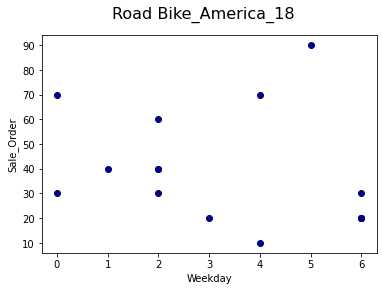

In [1748]:

plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันศุกร์
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('Road Bike_America_18',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี 2019

In [1749]:
RO_AMER_2019=RO_AMER[RO_AMER['year']==2019]

In [1750]:
set(RO_AMER_2019['mount'])

{1, 2, 3, 4, 5, 6, 12}

In [1751]:
RO_AMERICA_19=RO_AMER_2019.sort_values(by='mount').drop([1358,1372,1613,1614,1886])

In [1752]:
ORDER_RO_A=RO_AMERICA_19['SALESORDERITEM']
WEEKDAY_RO_A=RO_AMERICA_19['weekday']

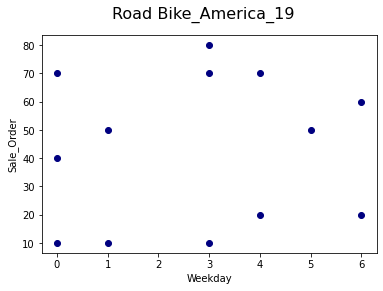

In [1753]:

plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันพุธ
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('Road Bike_America_19',fontsize=16)
plt.show()

In [1754]:
RO_AMERICA= pd.concat([RO_AMERICA_18,RO_AMERICA_19])

######2) Region: Asia_Pacific_and_Japan

In [1755]:
RO_APJ=RO[RO['Region']=='APJ'] #ทวีป Asia_Pacific_and_Japan

######เรียกดูข้อมูลปี 2018 

In [1756]:
RO_APJ_2018=RO_APJ[RO_APJ['year']==2018]

In [1757]:
RO_APJ_18=RO_APJ_2018.sort_values(by='mount').drop(849)

In [1758]:
ORDER_RO_A=RO_APJ_18['SALESORDERITEM']
WEEKDAY_RO_A=RO_APJ_18['weekday']

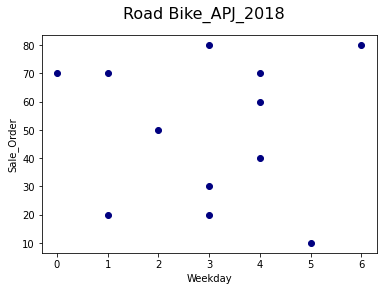

In [1759]:

plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันพุธ และวันเสาร์
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('Road Bike_APJ_2018',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี 2019

In [1760]:
RO_APJ_2019=RO_APJ[RO_APJ['year']==2019]

In [1761]:
RO_APJ_19=RO_APJ_2019.sort_values(by='mount').drop([1184,1199,1277,1544])

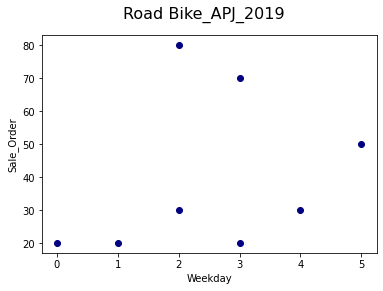

In [1762]:
ORDER_RO_A=RO_APJ_19['SALESORDERITEM']
WEEKDAY_RO_A=RO_APJ_19['weekday']
plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันพุธ และวันจันทร์
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('Road Bike_APJ_2019',fontsize=16)
plt.show()

In [1763]:
RO_AP_J= pd.concat([RO_APJ_18,RO_APJ_19])

######3) Region:Europe_the_Middle_East_and_Africa

In [1764]:
RO_EMEA=RO[RO['Region']=='EMEA'] #ทวีป Europe_the_Middle_East_and_Africa

######เรียกดูข้อมูลปี 2018 

In [1765]:
RO_EMEA_2018=RO_EMEA[RO_EMEA['year']==2018]

In [1766]:
RO_EMEA_18=RO_EMEA_2018.sort_values(by='mount').drop([127,555,992,920,1082]) #ตัดข้อมูลที่สั่งในวันเดียวกันที่มีจำนวนคำสั่งซื้อน้อยกว่าทิ้ง 

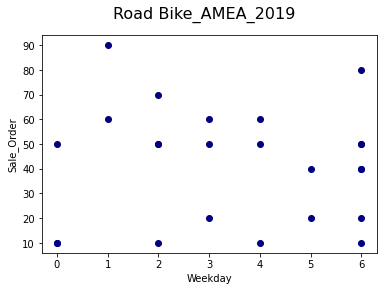

In [1767]:
ORDER_RO_A=RO_EMEA_18['SALESORDERITEM']
WEEKDAY_RO_A=RO_EMEA_18['weekday']
plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันพุธ และวันจันทร์
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('Road Bike_AMEA_2019',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี 2019

In [1768]:
RO_EMEA_2019=RO_EMEA[RO_EMEA['year']==2019]

In [1769]:
RO_EMEA_19=RO_EMEA_2019.sort_values(by='mount').drop([1072,1167,1260,1287,1850])#ตัดข้อมูลที่สั่งในวันเดียวกันที่มีจำนวนคำสั่งซื้อน้อยกว่าทิ้ง 

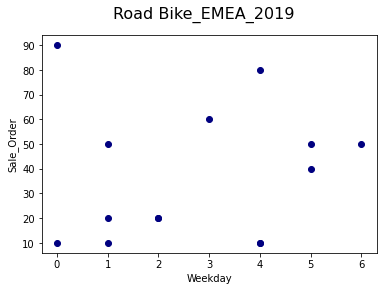

In [1770]:
ORDER_RO_A=RO_EMEA_19['SALESORDERITEM']
WEEKDAY_RO_A=RO_EMEA_19['weekday']
plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันอาทิตย์
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('Road Bike_EMEA_2019',fontsize=16)
plt.show()

In [1771]:
RO_E_MEA= pd.concat([RO_EMEA_18,RO_EMEA_19])

######รวมตาราง ทั้งสามทวีป

In [1772]:
Road_Bike= pd.concat([RO_AMERICA,RO_AP_J,RO_E_MEA])

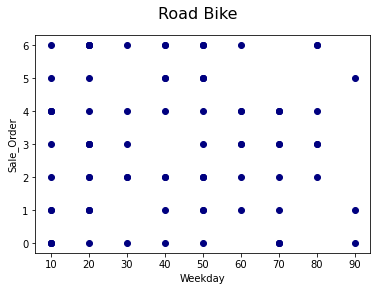

In [1773]:
ORDER_RO_A=Road_Bike['SALESORDERITEM']
WEEKDAY_RO_A=Road_Bike['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันอาทิตย์ จันทร์ และ ศุกร์
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('Road Bike',fontsize=16)
plt.show()

####4.3 รถจักยานต์ชนิด BMX : BX

In [1774]:
BX=Sale[Sale['name_product']=='BX']

#####4.3.1 ดูข้อมูลในแต่ละทวีป

######1) Region:America

In [1775]:
BX_AMER=BX[BX['Region']=='AMER'] #ทวีป America

######เรียกดูข้อมูลปี 2018 

In [1776]:
BX_AMER_2018=BX_AMER[BX_AMER['year']==2018]

In [1777]:
BX_AMER_18=BX_AMER_2018.sort_values(by='mount').drop([595,596,600,601,602,680,833,770])

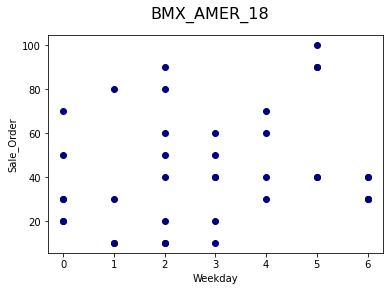

In [1778]:
ORDER_RO_A=BX_AMER_18['SALESORDERITEM']
WEEKDAY_RO_A=BX_AMER_18['weekday']
plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันพุธ และวันจันทร์
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('BMX_AMER_18',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี *2019* 

In [1779]:
BX_AMER_2019=BX_AMER[BX_AMER['year']==2019]

In [1780]:
BX_AMER_19=BX_AMER_2019.sort_values(by='mount').drop([1407,1416,1413,1368,1579,1719,1760,1908,1770,1893])

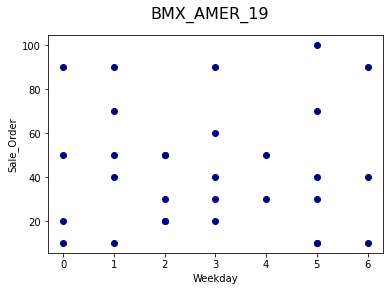

In [1781]:
ORDER_RO_A=BX_AMER_19['SALESORDERITEM']
WEEKDAY_RO_A=BX_AMER_19['weekday']
plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันพุธ และวันจันทร์
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('BMX_AMER_19',fontsize=16)
plt.show()

In [1782]:
BX_A_MER= pd.concat([BX_AMER_18,BX_AMER_19])

######2) Region: Asia_Pacific_and_Japan

In [1783]:
BX_APJ=BX[BX['Region']=='APJ'] #ทวีป Asia_Pacific_and_Japan

######เรียกดูข้อมูลปี 2018 

In [1784]:
BX_APJ_2018=BX_APJ[BX_APJ['year']==2018]

In [1785]:
set(BX_APJ['mount'])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [1786]:
BX_APJ_2018_6=BX_APJ_2018[(BX_APJ_2018['mount']>=1)&(BX_APJ_2018['mount']<=6)].sort_values(by='mount').drop([10,46,239,238,117,155,242,245,349,357,358]) #ครึ่งปีแรก

In [1787]:
BX_APJ_2018_12=BX_APJ_2018[(BX_APJ_2018['mount']>=7)&(BX_APJ_2018['mount']<=12)].sort_values(by='mount').drop([391,395,538,645,666,678,823,786,795,973,968,967,851,977,981,1062,1116]) #ครึ่งปีหลัง

In [1788]:
BX_APJ_18= pd.concat([BX_APJ_2018_6,BX_APJ_2018_12])

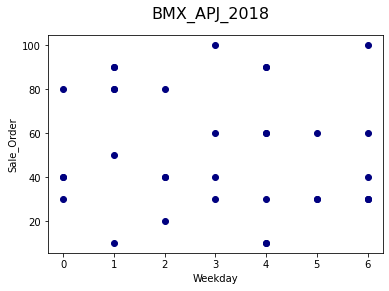

In [1789]:
ORDER_RO_A=BX_APJ_18['SALESORDERITEM']
WEEKDAY_RO_A=BX_APJ_18['weekday']
plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันพุธ และวันเสาร์
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('BMX_APJ_2018',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี 2019 

In [1790]:
BX_APJ_2019=BX_APJ[BX_APJ['year']==2019]

In [1791]:
BX_APJ_19=BX_APJ_2019.sort_values(by='mount').drop([1200,1269,1432,1521,1636,1600,1598,1926,1928])

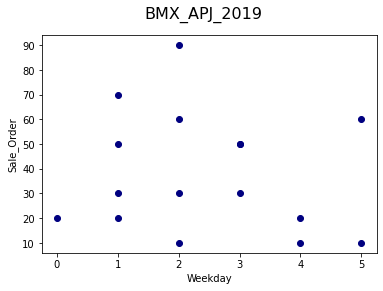

In [1792]:
ORDER_RO_A=BX_APJ_19['SALESORDERITEM']
WEEKDAY_RO_A=BX_APJ_19['weekday']
plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันอังคาร
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('BMX_APJ_2019',fontsize=16)
plt.show()

In [1793]:
BX_A_PJ= pd.concat([BX_APJ_18,BX_APJ_19])

######3) Region:Europe_the_Middle_East_and_Africa

In [1794]:
BX_EMEA=BX[BX['Region']=='EMEA']

In [1795]:
BX_EMEA

,SALESORDERID,SALESORDERITEM,PRODUCTID,NOTEID,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,ITEMATPSTATUS,OPITEMPOS,QUANTITY,QUANTITYUNIT,DELIVERYDATE,name_product,Region,Name_Region,DATE,weekday,day,mount,year
13,500000003,20,BX-1013,,USD,449,392.875,56.125,I,NaN,2,EA,20180223,BX,EMEA,2,2018-02-23,4,23,2,2018
20,500000004,10,BX-1014,,USD,799,699.125,99.875,I,NaN,3,EA,20180305,BX,EMEA,2,2018-03-05,0,5,3,2018
23,500000004,40,BX-1013,,USD,449,392.875,56.125,I,NaN,6,EA,20180305,BX,EMEA,2,2018-03-05,0,5,3,2018
31,500000005,40,BX-1011,,USD,249,217.875,31.125,I,NaN,10,EA,20180301,BX,EMEA,2,2018-03-01,3,1,3,2018
86,500000016,20,BX-1012,,USD,399,349.125,49.875,I,NaN,1,EA,20180307,BX,EMEA,2,2018-03-07,2,7,3,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,500000321,90,BX-1012,,USD,399,349.125,49.875,I,NaN,7,EA,20190605,BX,EMEA,2,2019-06-05,2,5,6,2019
1867,500000322,30,BX-1013,,USD,449,392.875,56.125,I,NaN,5,EA,20190617,BX,EMEA,2,2019-06-17,0,17,6,2019
1880,500000323,60,BX-1011,,USD,249,217.875,31.125,I,NaN,9,EA,20190610,BX,EMEA,2,2019-06-10,0,10,6,2019
1883,500000324,20,BX-1016,,USD,319,279.125,39.875,I,NaN,2,EA,20190606,BX,EMEA,2,2019-06-06,3,6,6,2019


######เรียกดูข้อมูลปี 2018 

In [1796]:
BX_EMEA_2018=BX_EMEA[BX_EMEA['year']==2018]

In [1797]:
set(BX_EMEA_2018['mount'])

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [1798]:
BX_EMEA_2018_6=BX_EMEA_2018[(BX_EMEA_2018['mount']>=2)&(BX_EMEA_2018['mount']<=6)].sort_values(by='mount').drop([165,20,132,261,287,267,263,375,206,219,222,218,376])

In [1799]:
BX_EMEA_2018_12=BX_EMEA_2018[(BX_EMEA_2018['mount']>=7)&(BX_EMEA_2018['mount']<=12)].sort_values(by='mount').drop([881,879,755,705,700,759,889,1081,1086,1038,1040,958])

In [1800]:
BX_EMEA_18= pd.concat([BX_EMEA_2018_6,BX_EMEA_2018_12])

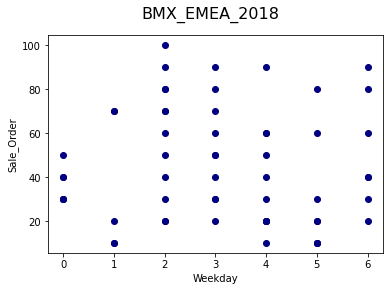

In [1801]:
ORDER_RO_A=BX_EMEA_18['SALESORDERITEM']
WEEKDAY_RO_A=BX_EMEA_18['weekday']
plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันอังคาร
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('BMX_EMEA_2018',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี 2019

In [1802]:
BX_EMEA_2019=BX_EMEA[BX_EMEA['year']==2019]

In [1803]:
set(BX_EMEA_2019['mount'])

{1, 2, 3, 4, 5, 6}

In [1804]:
BX_EMEA_2019_3=BX_EMEA_2019[(BX_EMEA_2019['mount']>=1)&(BX_EMEA_2019['mount']<=3)].sort_values(by='mount').drop([1292,1285,1282,1146,1179,1143,1347,1346,1348,1478,1376,1449])

In [1805]:
BX_EMEA_2019_6=BX_EMEA_2019[(BX_EMEA_2019['mount']>=4)&(BX_EMEA_2019['mount']<=6)].sort_values(by='mount').drop([1494,1749,1708,1668,1666,1744,1861,1883])

In [1806]:
BX_EMEA_19= pd.concat([BX_EMEA_2019_3,BX_EMEA_2019_6])

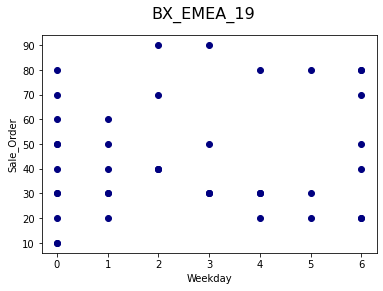

In [1807]:
ORDER_RO_A=BX_EMEA_19['SALESORDERITEM']
WEEKDAY_RO_A=BX_EMEA_19['weekday']
plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันพุธ และวันอังคาร
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('BX_EMEA_19',fontsize=16)
plt.show()

In [1808]:
BX_EM_EA= pd.concat([BX_EMEA_18,BX_AMER_19])

In [1809]:
BMX= pd.concat([BX_A_MER,BX_A_PJ,BX_EM_EA]) #รวมทวีป

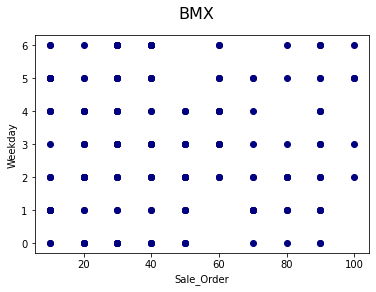

In [1810]:
ORDER_RO_A=BMX['SALESORDERITEM']
WEEKDAY_RO_A=BMX['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันพุธ เสาร์ ศุกร์และวันอังคาร 
plt.ylabel('Weekday')
plt.xlabel('Sale_Order')
plt.suptitle('BMX',fontsize=16)
plt.show()

####4.4 รถจักยานต์ชนิด Cyclo-cross : CC





In [1811]:
CC=Sale[Sale['name_product']=='CC']

In [1812]:
CC

,SALESORDERID,SALESORDERITEM,PRODUCTID,NOTEID,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,ITEMATPSTATUS,OPITEMPOS,QUANTITY,QUANTITYUNIT,DELIVERYDATE,name_product,Region,Name_Region,DATE,weekday,day,mount,year
4,500000001,30,CC-1021,,USD,1144,1001.000,143.000,I,NaN,3,EA,20180228,CC,EMEA,2,2018-02-28,2,28,2,2018
11,500000002,60,CC-1021,,USD,1144,1001.000,143.000,I,NaN,4,EA,20180309,CC,APJ,1,2018-03-09,4,9,3,2018
29,500000005,20,CC-1021,,USD,1144,1001.000,143.000,I,NaN,3,EA,20180301,CC,EMEA,2,2018-03-01,3,1,3,2018
43,500000008,20,CC-1022,,USD,1200,1050.000,150.000,I,NaN,6,EA,20180225,CC,EMEA,2,2018-02-25,6,25,2,2018
44,500000008,30,CC-1023,,USD,1361,1190.875,170.125,I,NaN,10,EA,20180225,CC,EMEA,2,2018-02-25,6,25,2,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,500000332,40,CC-1022,,USD,1200,1050.000,150.000,I,NaN,3,EA,20190619,CC,AMER,3,2019-06-19,2,19,6,2019
626,500000112,90,CC-1023,,USD,1361,1190.875,170.125,I,NaN,3,EA,20191212,CC,APJ,1,2019-12-12,3,12,12,2019
935,500000164,30,CC-1023,,USD,1361,1190.875,170.125,I,NaN,1,EA,20191212,CC,AMER,3,2019-12-12,3,12,12,2019
1787,500000308,40,CC-1023,,USD,1361,1190.875,170.125,I,NaN,3,EA,20191212,CC,AMER,3,2019-12-12,3,12,12,2019


######เรียกดูข้อมูลปี 2018

In [1813]:
CC_2018=CC[CC['year']==2018]

In [1814]:
set(CC_2018['mount'])

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [1815]:
CC_2018_6=CC_2018[(CC_2018['mount']>=2)&(CC_2018['mount']<=6)].sort_values(by='mount').drop([43,49,72,123,122,121,118,116,282,355])

In [1816]:
CC_2018_12=CC_2018[(CC_2018['mount']>=7)&(CC_2018['mount']<=12)].sort_values(by='mount').drop([709,649,897,859,869,1128])

In [1817]:
CC_18= pd.concat([CC_2018_6,CC_2018_12])

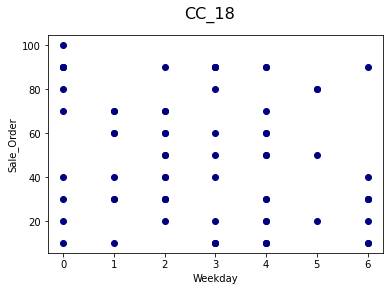

In [1818]:
ORDER_RO_A=CC_18['SALESORDERITEM']
WEEKDAY_RO_A=CC_18['weekday']
plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันอาทิตย์ 
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('CC_18',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี 2019

In [1819]:
CC_2019=CC[CC['year']==2019]

In [1820]:
set(CC_2019['mount'])

{1, 2, 3, 4, 5, 6, 12}

In [1821]:
CC_2019_6=CC_2019[(CC_2019['mount']>=1)&(CC_2019['mount']<=6)].sort_values(by='mount').drop([1171,1261,1264,1308,1557,1551,1801,1781,1755,1669,1667,1903,1855,1851,1821,1815])

In [1822]:
CC_2019_12=CC_2019[CC_2019['mount']==12].sort_values(by='mount').iloc[[0],]

In [1823]:
CC_19= pd.concat([CC_2019_6,CC_2019_6])

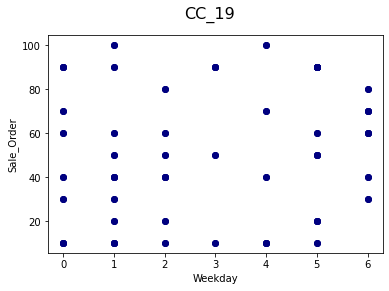

In [1824]:
ORDER_RO_A=CC_19['SALESORDERITEM']
WEEKDAY_RO_A=CC_19['weekday']
plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันอาทิตย์ 
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('CC_19',fontsize=16)
plt.show()

In [1825]:
Cyclo_cross_BiKE= pd.concat([CC_18,CC_19]) #รวมรายปี

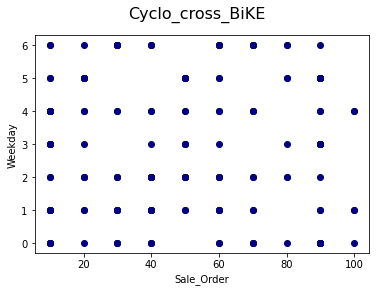

In [1826]:
ORDER_RO_A=Cyclo_cross_BiKE['SALESORDERITEM']
WEEKDAY_RO_A=Cyclo_cross_BiKE['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันอาทิตย์  จันทร์ และพฤหัสบดี
plt.ylabel('Weekday')
plt.xlabel('Sale_Order')
plt.suptitle('Cyclo_cross_BiKE',fontsize=16)
plt.show()

####4.5 รถจักยานต์ชนิด Mountain Bike:MB

In [1827]:
MB=Sale[Sale['name_product']=='MB']

######เรียกดูข้อมูลปี 2018

In [1828]:
MB_2018=MB[MB['year']==2018]

In [1829]:
set(MB_2018['mount'])

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [1830]:
MB_2018_7=MB_2018[(MB_2018['mount']>=2)&(MB_2018['mount']<=7)].sort_values(by='mount').drop([24,58,60,329,326,280,415,416,308,341,403,506,445])

In [1831]:
MB_2018_12=MB_2018[(MB_2018['mount']>=8)&(MB_2018['mount']<=12)].sort_values(by='mount').drop([532,599,682,682,644,845,817,835,752,723,721,952,910,1018,862,1025,1056,864,1018,937])

In [1832]:
MB_18= pd.concat([MB_2018_7,MB_2018_12])

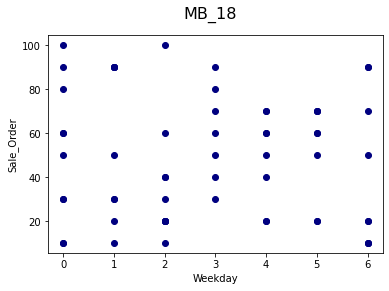

In [1833]:
ORDER_RO_A=MB_18['SALESORDERITEM']
WEEKDAY_RO_A=MB_18['weekday']
plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันอาทิตย์  อังคาร
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('MB_18',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี 2019

In [1834]:
MB_2019=MB[MB['year']==2019]

In [1835]:
set(MB_2019['mount'])

{1, 2, 3, 4, 5, 6, 7, 12}

In [1836]:
MB_2019_4=MB_2019[(MB_2019['mount']>=1)&(MB_2019['mount']<=4)].sort_values(by='mount').drop([1247,1224,1138,1390,1652,1623,1596,1513])

In [1837]:
MB_2019_12=MB_2019[(MB_2019['mount']>=5)&(MB_2019['mount']<=12)].sort_values(by='mount').drop([1735,1690,1885,1846,1820,1769,1823,1785])

In [1838]:
MB_19= pd.concat([MB_2019_4,MB_2019_12])

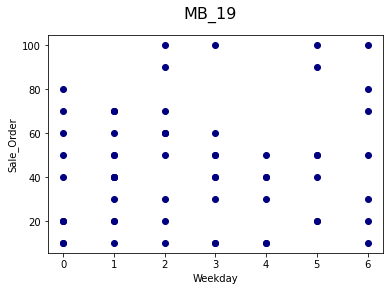

In [1839]:
ORDER_RO_A=MB_19['SALESORDERITEM']
WEEKDAY_RO_A=MB_19['weekday']
plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันอังคารพุธ เสาร์และอาทิตย์
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('MB_19',fontsize=16)
plt.show()

In [1840]:
Mountain_Bike= pd.concat([MB_18,MB_19])  #รวมข้อมูลรายปี

####4.6 รถจักยานต์ชนิด Racing_BiKe:RC

In [1841]:
RC=Sale[Sale['name_product']=='RC']

In [1842]:
RC

,SALESORDERID,SALESORDERITEM,PRODUCTID,NOTEID,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,ITEMATPSTATUS,OPITEMPOS,QUANTITY,QUANTITYUNIT,DELIVERYDATE,name_product,Region,Name_Region,DATE,weekday,day,mount,year
3,500000001,20,RC-1056,,USD,2499,2186.625,312.375,I,NaN,2,EA,20180228,RC,EMEA,2,2018-02-28,2,28,2,2018
7,500000002,20,RC-1055,,USD,1999,1749.125,249.875,I,NaN,3,EA,20180309,RC,APJ,1,2018-03-09,4,9,3,2018
12,500000003,10,RC-1056,,USD,2499,2186.625,312.375,I,NaN,3,EA,20180223,RC,EMEA,2,2018-02-23,4,23,2,2018
14,500000003,30,RC-1056,,USD,2499,2186.625,312.375,I,NaN,5,EA,20180223,RC,EMEA,2,2018-02-23,4,23,2,2018
26,500000004,70,RC-1051,,USD,2499,2186.625,312.375,I,NaN,10,EA,20180305,RC,EMEA,2,2018-03-05,0,5,3,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,500000332,70,RC-1055,,USD,1999,1749.125,249.875,I,NaN,4,EA,20190619,RC,AMER,3,2019-06-19,2,19,6,2019
1924,500000332,80,RC-1054,,USD,5499,4811.625,687.375,I,NaN,1,EA,20190619,RC,AMER,3,2019-06-19,2,19,6,2019
622,500000112,50,RC-1054,,USD,5499,4811.625,687.375,I,NaN,2,EA,20191212,RC,APJ,1,2019-12-12,3,12,12,2019
933,500000164,10,RC-1055,,USD,1999,1749.125,249.875,I,NaN,7,EA,20191212,RC,AMER,3,2019-12-12,3,12,12,2019


######เรียกดูข้อมูลปี 2018

In [1843]:
######เรียกดูข้อมูลปี 2018

In [1844]:
RC_2018=RC[RC['year']==2018]

In [1845]:
set(RC_2018['mount'])

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [1846]:
RC_2018_6=RC_2018[(RC_2018['mount']>=2)&(RC_2018['mount']<=6)].sort_values(by='mount').drop([12,111,92,85,70,38,28,142,141,156,290,289,288,291,265,244,324,352])

In [1847]:
RC_2018_12=RC_2018[(RC_2018['mount']>=7)&(RC_2018['mount']<=12)].sort_values(by='mount').drop([594,590,571,612,521,493,497,660,661,663,654,630,628,609])

In [1848]:
RC_18= pd.concat([RC_2018_6,RC_2018_6])

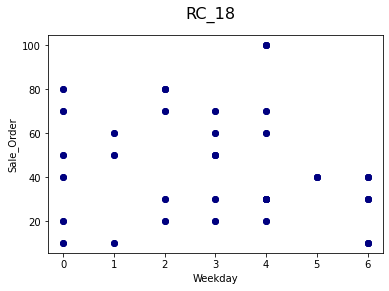

In [1849]:
ORDER_RO_A=RC_18['SALESORDERITEM']
WEEKDAY_RO_A=RC_18['weekday']
plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันพฤหัสบดี
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('RC_18',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี 2019

In [1850]:
RC_2019=RC[RC['year']==2019]

In [1851]:
set(RC_2018['mount'])

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [1852]:
RC_2019_4=RC_2019[(RC_2019['mount']>=2)&(RC_2019['mount']<=4)].sort_values(by='mount').drop([1320,1343,1363,1398,1464,1543,1394,1383,1382,1554,1510,1506,1503,1497,1496,1624])

In [1853]:
RC_2019_12=RC_2019[(RC_2019['mount']>=5)&(RC_2019['mount']<=12)].sort_values(by='mount').drop([1763,1761,1757,1737,1731,1712,1704,1697,1696,1695,1693,1901,1904,1916,1922,1774,1831,1793,933])

In [1854]:
RC_19= pd.concat([RC_2019_4,RC_2019_12])

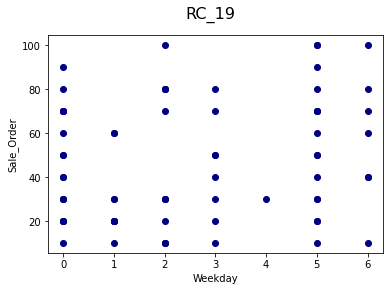

In [1855]:
ORDER_RO_A=RC_19['SALESORDERITEM']
WEEKDAY_RO_A=RC_19['weekday']
plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันพฤหัสบดี
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('RC_19',fontsize=16)
plt.show()

In [1856]:
Racing_Bike= pd.concat([RC_18,RC_19]) #รวมข้อมูลรายปี

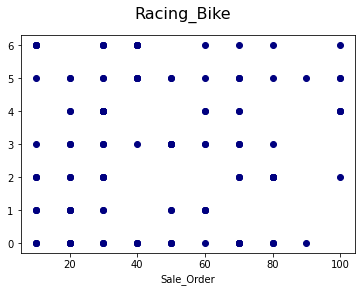

In [1857]:
ORDER_RO_A=Racing_Bike['SALESORDERITEM']
WEEKDAY_RO_A=Racing_Bike['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันอังคาร วันพฤหัสบดี ศุกร์ และเสาร์
plt.xlabel('Sale_Order')
plt.suptitle('Racing_Bike',fontsize=16)
plt.show()

####4.7 รถจักยานต์ชนิด Downhill Bike

In [1858]:
DB=Sale[Sale['name_product']=='DB']

######เรียกดูข้อมูลปี 2018

In [1859]:
DB_2018=DB[DB['year']==2018]

In [1860]:
set(DB_2018['mount'])

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [1861]:
DB_2018_6=DB_2018[(DB_2018['mount']>=2)&(DB_2018['mount']<=6)].sort_values(by='mount').drop([8,77,91,228,130,99,252,264,283])

In [1862]:
DB_2018_12=DB_2018[(DB_2018['mount']>=7)&(DB_2018['mount']<=12)].sort_values(by='mount').drop([742,1035,729,918,1153])

In [1863]:
DB_18= pd.concat([DB_2018_6,DB_2018_6])

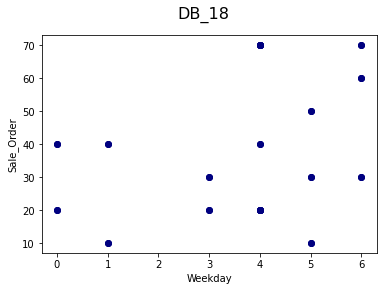

In [1864]:
ORDER_RO_A=DB_18['SALESORDERITEM']
WEEKDAY_RO_A=DB_18['weekday']
plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ วันพฤหัสบดี  และเสาร์
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('DB_18',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี 2019

In [1865]:
DB_2019=DB[DB['year']==2019]

In [1866]:
DB_19=DB_2019.drop([1221,1257,1353,1377,1387,1486,1546,1837,1838,1856,619])

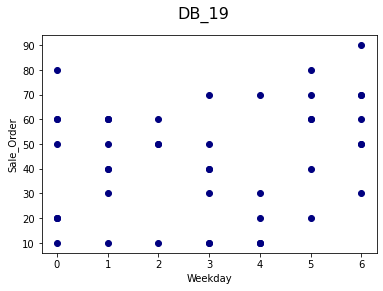

In [1867]:
ORDER_RO_A=DB_19['SALESORDERITEM']
WEEKDAY_RO_A=DB_19['weekday']
plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ เสาร์
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('DB_19',fontsize=16)
plt.show()

In [1868]:
Downhill_Bike= pd.concat([DB_18,DB_19]) #ต่อตาราง

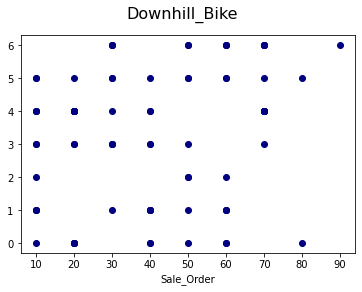

In [1869]:
ORDER_RO_A=Downhill_Bike['SALESORDERITEM']
WEEKDAY_RO_A=Downhill_Bike['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ วันพฤหัสบดี  และเสาร์
plt.xlabel('Sale_Order')
plt.suptitle('Downhill_Bike',fontsize=16)
plt.show()

####4.8 รถจักยานต์ชนิด eBike:EB

In [1870]:
EB=Sale[Sale['name_product']=='EB']

######เรียกดูข้อมูลปี 2018

In [1871]:
EB_2018=EB[EB['year']==2018]

In [1872]:
set(EB_2018['mount'])

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [1873]:
EB_2018_6=EB_2018[(EB_2018['mount']>=2)&(EB_2018['mount']<=6)].sort_values(by='mount').drop([16,9,48,47,164,88,36,34,19,233,195,194,196,180,147,158,311,272,209,210,214,216,373,50,294,295,293,343])

In [1874]:
EB_2018_12=EB_2018[(EB_2018['mount']>=7)&(EB_2018['mount']<=12)].sort_values(by='mount').drop([418,417,392,390,542,536,689,651,692,746,843,837,826,785,756,842,822,785,735,842,720,919,702,719,1084,978,955,930,927,964,896,895,1104,1000,870,1017,1005,1059,1063,1002,938])

In [1875]:
EB_18= pd.concat([EB_2018_6,EB_2018_12]) #ต่อตาราง

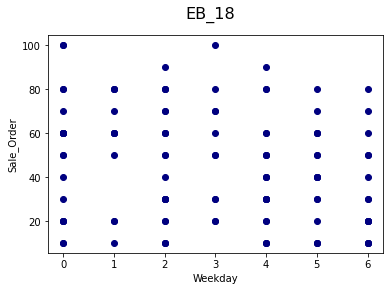

In [1876]:
ORDER_RO_A=EB_18['SALESORDERITEM']
WEEKDAY_RO_A=EB_18['weekday']
plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ วันอาทิตย์และวันพุธ
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('EB_18',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี 2019

In [1877]:
EB_2019=EB[EB['year']==2019]

In [1878]:
set(EB_2019['mount'])

{1, 2, 3, 4, 5, 6, 7, 12}

In [1879]:
EB_2019_2=EB_2019[(EB_2019['mount']>=1)&(EB_2019['mount']<=2)].sort_values(by='mount').drop([1274,1267,1245,1161,1208,1192,1162,1173,1399,1149,1178,1400,1349,1185,1217])

In [1880]:
EB_2019_4=EB_2019[(EB_2019['mount']>=3)&(EB_2019['mount']<=4)].sort_values(by='mount').drop([1616,1597,1586,1576,1609,1536,1533,1507,1501,1559])

In [1881]:
EB_2019_12=EB_2019[(EB_2019['mount']>=5)&(EB_2019['mount']<=12)].sort_values(by='mount').drop([1691,1678,1672,1650,1662,1875,1858,1910,1792,934])

In [1882]:
EB_19= pd.concat([EB_2019_2,EB_2019_4,EB_2019_12]) #ต่อตาราง

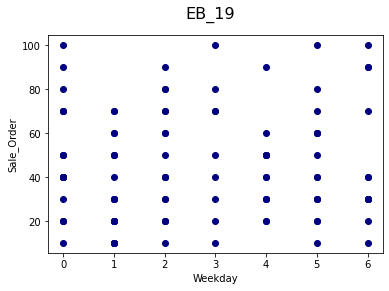

In [1883]:
ORDER_RO_A=EB_19['SALESORDERITEM']
WEEKDAY_RO_A=EB_19['weekday']
plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ วันอาทิตย์ วันพุธ ศุุกร์และเสาร์
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('EB_19',fontsize=16)
plt.show()

In [1884]:
eBike= pd.concat([EB_18,EB_19]) #ต่อตารางข้อมูลรายปีที่ตัดข้อมูลวันที่ที่ มีค่าซ้ำ โดยเลือกวันที่ที่มียอดคำสั่งสินค้าสูงสุด ที่เหลือตัดทิ้งทิ้ง

####4.9 รถจักยานต์ชนิด Cruiser:CB

In [1885]:
CB=Sale[Sale['name_product']=='CB']

######เรียกดูข้อมูลปี 2018

In [1886]:
CB_2018=CB[CB['year']==2018]

In [1887]:
set(CB_2018['mount'])

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [1888]:
CB_2018_6=CB_2018[(CB_2018['mount']>=2)&(CB_2018['mount']<=6)].sort_values(by='mount').drop([76,200,144,338,325,309,254,243,215,296,348])

In [1889]:
CB_2018_12=CB_2018[(CB_2018['mount']>=7)&(CB_2018['mount']<=12)].sort_values(by='mount').drop([389,487,550,552,715,917,993,1110,1045])

In [1890]:
CB_18= pd.concat([CB_2018_6,CB_2018_12]) #ต่อตาราง

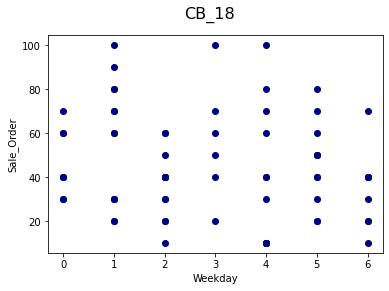

In [1891]:
ORDER_RO_A=CB_18['SALESORDERITEM']
WEEKDAY_RO_A=CB_18['weekday']
plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ วันจันทร์ วันพุธ และวันพฤหัสบดี
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('CB_18',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี 2019

In [1892]:
CB_2019=CB[CB['year']==2019]

In [1893]:
CB_19=CB_2019.sort_values(by='mount').drop([1195,1338,1625,1573,1523,1457,1460,1585,1529,1868,1826,1825,624])

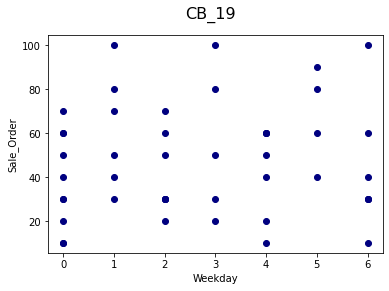

In [1894]:
ORDER_RO_A=CB_19['SALESORDERITEM']
WEEKDAY_RO_A=CB_19['weekday']
plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ วันจันทร์ วันพุธ และวันพฤหัสบดี
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('CB_19',fontsize=16)
plt.show()

In [1895]:
Cruiser= pd.concat([CB_18,CB_19]) ##ต่อตารางข้อมูลรายปีที่ตัดข้อมูลวันที่ที่ มีค่าซ้ำ โดยเลือกวันที่ที่มียอดคำสั่งสินค้าสูงสุด ที่เหลือตัดทิ้งทิ้ง

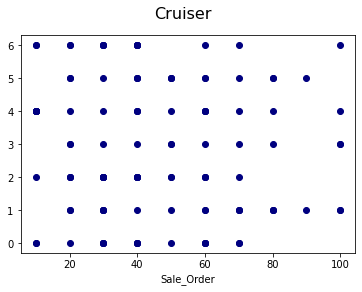

In [1896]:
ORDER_RO_A=Cruiser['SALESORDERITEM']
WEEKDAY_RO_A=Cruiser['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ วันจันทร์ วันพุธ และวันพฤหัสบดี
plt.xlabel('Sale_Order')
plt.suptitle('Cruiser',fontsize=16)
plt.show()

####4.10 รถจักยานต์ชนิด Hybrid Bike:HB

In [1897]:
HB=Sale[Sale['name_product']=='HB']

######เรียกดูข้อมูลปี 2018

In [1898]:
HB_2018=HB[HB['year']==2018]

In [1899]:
set(HB_2018['mount'])

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [1900]:
HB_2018_6=HB_2018[(HB_2018['mount']>=2)&(HB_2018['mount']<=6)].sort_values(by='mount').drop([126,163,6,54,198,140,133,154,115,336,335,334,304,301,302,385,380,374,366,351,399,372])

In [1901]:
HB_2018_9=HB_2018[(HB_2018['mount']>=7)&(HB_2018['mount']<=9)].sort_values(by='mount').drop([504,439,512,665,672])

In [1902]:
HB_2018_12=HB_2018[(HB_2018['mount']>=10)&(HB_2018['mount']<=12)].sort_values(by='mount').drop([815,794,793,792,788,781,763,758,970,1014,781,763,758,970,1014,991,901,872,807,1048,954])

In [1903]:
HB_18= pd.concat([HB_2018_6,HB_2018_9,HB_2018_12]) #ต่อตารางรายเดือนในปี 2018

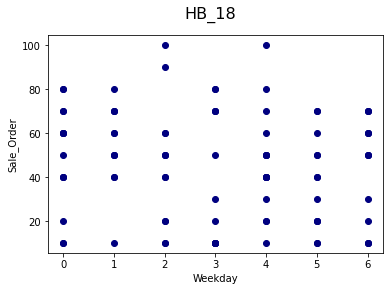

In [1904]:
ORDER_RO_A=HB_18['SALESORDERITEM']
WEEKDAY_RO_A=HB_18['weekday']
plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ วันอังคารและวันพฤหัสบดี
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('HB_18',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี 2019

In [1905]:
HB_2019=HB[HB['year']==2019]

In [1906]:
set(HB_2019['mount'])

{1, 2, 3, 4, 5, 6, 7, 12}

In [1907]:
HB_2019_3=HB_2019[(HB_2019['mount']>=1)&(HB_2019['mount']<=3)].sort_values(by='mount').drop([1283,1228,1181,1174,1408,1329,1323,1318,1314,1315,1430,1433,1447])

In [1908]:
HB_2019_12=HB_2019[(HB_2019['mount']>=4)&(HB_2019['mount']<=12)].sort_values(by='mount').drop([1642,1620,1617,1535,1508,1504,1659,1685,1913,1872,1870,1869,1840,1812,1810])

In [1909]:
HB_19= pd.concat([HB_2019_3,HB_2019_12]) #ต่อตารางรายเดือนในปี 2018

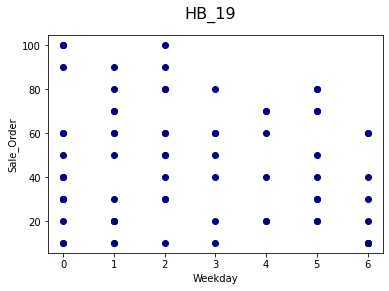

In [1910]:
ORDER_RO_A=HB_19['SALESORDERITEM']
WEEKDAY_RO_A=HB_19['weekday']
plt.scatter(WEEKDAY_RO_A,ORDER_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ วันอาทิตย์ และวันอังคาร
plt.xlabel('Weekday')
plt.ylabel('Sale_Order')
plt.suptitle('HB_19',fontsize=16)
plt.show()

In [1911]:
Hybrid_Bike= pd.concat([HB_18,HB_19]) ##ต่อตารางข้อมูลรายปีที่ตัดข้อมูลวันที่ที่ มีค่าซ้ำ โดยเลือกวันที่ที่มียอดคำสั่งสินค้าสูงสุด ที่เหลือตัดทิ้งทิ้ง

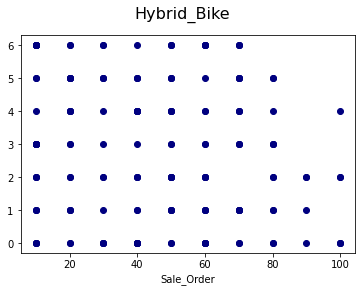

In [1912]:
ORDER_RO_A=Hybrid_Bike['SALESORDERITEM']
WEEKDAY_RO_A=Hybrid_Bike['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ วันอาทิตย์ และวันอังคาร
plt.xlabel('Sale_Order')
plt.suptitle('Hybrid_Bike',fontsize=16)
plt.show()

###ขั้นที่ 5 นำข้อมูลวันที่ที่ มีค่าซ้ำ โดยเลือกเฉพาะวันที่ที่มียอดคำสั่งสินค้าสูงสุด ที่เหลือตัดทิ้ง ในขั้นตอนที่ 4 ตามชนิดของจักรยานต์มาต่อกัน




##### เชื่อมตาราง เลือกเฉพาะคอลัมน์ ทวีปของคู่ค้า:Region ,วันในสัปดาห์:weekday และ ชื่อสินค้า:name_product

In [1913]:
 Sale_Order_item=pd.concat([Road_Bike,BMX,Cyclo_cross_BiKE,Mountain_Bike,Racing_Bike,Downhill_Bike,eBike,Cruiser,Hybrid_Bike]).iloc[:,[15,17,13]]

#####ข้อมูลวันในสัปดาห์ที่มี ยอดคำสั่งซื้อสูงสุดเรียงจากมากไปน้อย

In [1914]:
 Sale_Or=pd.concat([Road_Bike,BMX,Cyclo_cross_BiKE,Mountain_Bike,Racing_Bike,Downhill_Bike,eBike,Cruiser,Hybrid_Bike]).iloc[:,[1,15,17,13]]

######ยอดคำสั่งซื้อทุกทวีป (เวลาแบบยุโรป)

In [1915]:
 Word=Sale_Or.groupby('weekday').sum().sort_values(by=['SALESORDERITEM'],ascending=False).reset_index()

In [1916]:
 Word

,weekday,SALESORDERITEM,Name_Region
0,0,10060,459
1,2,9680,449
2,1,8920,391
3,5,8540,371
4,4,8390,349
5,3,7880,354
6,6,7600,361


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


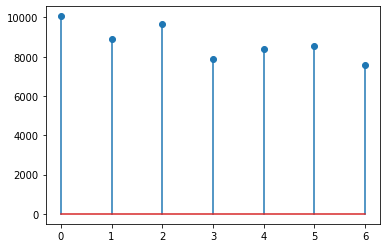

In [1917]:
import matplotlib.pyplot as plt
import numpy as np


# make data

x =Word['weekday']
y = Word['SALESORDERITEM']

# plot
fig, ax = plt.subplots()

ax.stem(x, y)


plt.show()

######ยอดคำสั่งซื้อตามวันในสัปดาห์ของอเมริกา('AMER':3) 
เวลาแบบยุโรป

In [1918]:
AMERICA=Sale_Or[Sale_Or['Name_Region']==3]

In [1919]:
A_MERICA=AMERICA.groupby('weekday').sum().sort_values(by=['SALESORDERITEM'],ascending=False).reset_index()

In [1920]:
A_MERICA

,weekday,SALESORDERITEM,Name_Region
0,5,3300,177
1,2,3130,222
2,3,2960,192
3,0,2840,198
4,1,2240,174
5,6,1920,141
6,4,1350,99


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


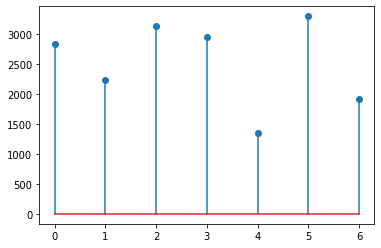

In [1921]:
import matplotlib.pyplot as plt
import numpy as np


# make data

x =A_MERICA['weekday']
y = A_MERICA['SALESORDERITEM']

# plot
fig, ax = plt.subplots()

ax.stem(x, y)


plt.show()

######ยอดคำสั่งซื้อตามวันในสัปดาห์ขอEurope_the_Middle_East_and_Africa :'EMEA':2
เวลาแบบยุโรป

In [1922]:
Europe=Sale_Or[Sale_Or['Name_Region']==2]

In [1923]:
Eu_rope=Europe.groupby('weekday').sum().sort_values(by=['SALESORDERITEM'],ascending=False).reset_index()

In [1924]:
Eu_rope

,weekday,SALESORDERITEM,Name_Region
0,0,5020,220
1,2,4230,182
2,6,3980,178
3,4,3810,174
4,1,3400,156
5,5,3400,148
6,3,2830,122


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


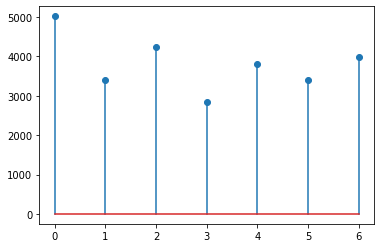

In [1925]:
import matplotlib.pyplot as plt
import numpy as np


# make data

x =Eu_rope['weekday']
y = Eu_rope['SALESORDERITEM']

# plot
fig, ax = plt.subplots()

ax.stem(x, y)


plt.show()

######ยอดคำสั่งซื้อตามวันในสัปดาห์ของAsia ('APJ':1)
เวลาแบบยุโรป

In [1926]:
Asia=Sale_Or[Sale_Or['Name_Region']==1]

In [1927]:
A_sia=Asia.groupby('weekday').sum().sort_values(by=['SALESORDERITEM'],ascending=False).reset_index()

In [1928]:
A_sia

,weekday,SALESORDERITEM,Name_Region
0,1,3280,61
1,4,3230,76
2,2,2320,45
3,0,2200,41
4,3,2090,40
5,5,1840,46
6,6,1700,42


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


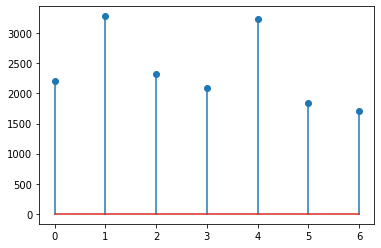

In [1929]:
import matplotlib.pyplot as plt
import numpy as np


# make data

x = A_sia['weekday']
y = A_sia['SALESORDERITEM']

# plot
fig, ax = plt.subplots()

ax.stem(x, y)


plt.show()

##ขั้นที่ 6ดูการกระจายตัวของข้อมูล

In [1964]:
 dw_mapping={'BX':1, 'CB':2, 'CC':3, 'DB':4, 'EB':5, 'HB':6, 'MB':7, 'RC':8, 'RO':9}
 Sale_Order_item['Name_Product']= Sale_Order_item['name_product'].map(dw_mapping)

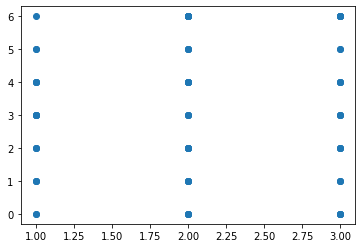

In [1980]:
plt.scatter(Road_Bike['Name_Region'],Road_Bike['weekday']) #จักรยาน Road_Bike

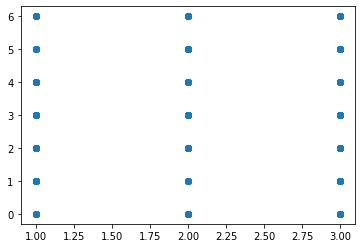

In [1982]:
plt.scatter(BMX['Name_Region'],BMX['weekday']) ## จักรยาน BMX

In [1989]:
#plot จักรยานทุกชนิดรวมกัน
import numpy as np
XX=np.array(Sale_Order_item[['Name_Region','weekday']])
yy=np.array(Sale_Order_item['Name_Product'],dtype=np.int32)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


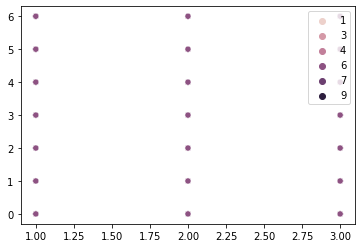

In [1968]:

sns.scatterplot(XX[:,0], XX[:,1], c=yy,hue=yy)  #เนื่องจากพิกัดจุดทับกันจึงทำให้เห็นการกระจายตัวไม่ชัดเจน และจึงเห็นเป็นสีเดียวกัน


####ดูจำนวนข้อมูลในแต่ละ class

In [1969]:
Sale_Order_item.groupby('name_product').count().reset_index().iloc[:,[0,1]]

,name_product,Name_Region
0,BX,207
1,CB,120
2,CC,172
3,DB,84
4,EB,229
5,HB,172
6,MB,125
7,RC,147
8,RO,86


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


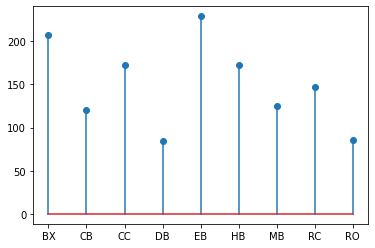

In [1935]:
import matplotlib.pyplot as plt
import numpy as np


# make data

x =  Sale_Order_item1['name_product']
y =  Sale_Order_item1['Name_Region']

# plot
fig, ax = plt.subplots()

ax.stem(x, y)


plt.show()

####แบ่งกลุ่มข้อมูล

In [1985]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

In [1986]:
def elbow_plot(X, from_k=2, to_k=5):
    '''
    plot elbow chart to help determining optimal number of clusters
    '''
    ssd=[]
    for k in range(from_k, to_k + 1):
        m=KMeans(n_clusters=k)
        m.fit(X)
        ssd.append([k, m.inertia_])
    dd=pd.DataFrame(ssd, columns=['k', 'ssd'])
    dd['pct_chg']=dd['ssd'].pct_change() * 100
    plt.plot(dd['k'], dd['ssd'], linestyle='--', marker='o')
    # plt.plot(xy[:, 0], xy[:, 1], '--o')
    for index, row in dd.iterrows():
        plt.text(row['k']+.02, row['ssd']+.02, f'{row["pct_chg"]:.2f}', fontsize=12)

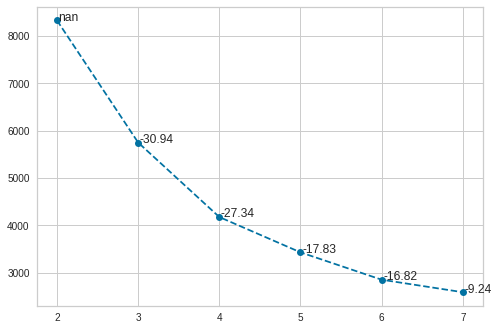

In [2104]:
elbow_plot(XX, 2, 7)

#####จากกราฟจะแบ่งข้อมูลเป็น 3 กลุ่ม

In [1992]:
model=KMeans(n_clusters=3)

In [2105]:
model.fit(X)

KMeans(n_clusters=3)

In [2106]:
model.labels_

array([2, 1, 0, ..., 1, 2, 1], dtype=int32)

In [2107]:
Sale_Order_item['cluster']=model.labels_

In [2108]:
Sale_Order_item

,Name_Region,weekday,name_product,Name_Product,cluster
96,3,0,RO,9,2
71,3,2,RO,9,1
56,3,4,RO,9,0
100,3,6,RO,9,0
179,3,3,RO,9,1
...,...,...,...,...,...
1806,2,3,HB,6,1
1794,1,2,HB,6,1
1857,2,2,HB,6,1
1899,2,0,HB,6,2


##ขั้นที่7 classification โดยใช้ 
1.kNN_evaluation
2.Decision_Tree

    

##### Load data

In [2006]:
 Sale_Order_item

,Name_Region,weekday,name_product,Name_Product,cluster
96,3,0,RO,9,0
71,3,2,RO,9,2
56,3,4,RO,9,1
100,3,6,RO,9,1
179,3,3,RO,9,2
...,...,...,...,...,...
1806,2,3,HB,6,2
1794,1,2,HB,6,2
1857,2,2,HB,6,2
1899,2,0,HB,6,0


In [2014]:
import numpy as np
X=np.array( Sale_Order_item[['Name_Region','weekday']])
Y=np.array( Sale_Order_item['cluster'])

###Split data

In [2072]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=6)
X_traintrain, X_val, y_traintrain, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=6) 

###import

In [2073]:
from sklearn.tree import DecisionTreeClassifier ##ต้มไม้

In [2074]:
from sklearn.neighbors import KNeighborsClassifier ### KNN

In [2075]:
from sklearn.model_selection import train_test_split

###Define





#####Decision_Tree

In [2076]:
from sklearn.model_selection import cross_val_score
mytree1 = DecisionTreeClassifier(criterion='entropy',max_depth=7) 

csv = cross_val_score(mytree1 ,X_traintrain,y_traintrain, cv=10) #แบ่งข้อมูลเป็น 5 ส่วน
print(csv.round(2)) #กำหนดทศนิยม 3 ตำแหน่ง
csv.mean().round(3) # หาค่าเฉลี่ยของcsv 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


1.0

In [2077]:
from sklearn.model_selection import cross_val_score
mytree2 = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=15) 

csv = cross_val_score(mytree2 ,X_traintrain,y_traintrain, cv=10) #แบ่งข้อมูลเป็น 5 ส่วน
print(csv.round(2)) #กำหนดทศนิยม 3 ตำแหน่ง
csv.mean().round(3) # หาค่าเฉลี่ยของcsv 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


1.0

In [2078]:
from sklearn.model_selection import cross_val_score
mytree3 = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=7) 

csv = cross_val_score(mytree3 ,X_traintrain,y_traintrain, cv=10) #แบ่งข้อมูลเป็น 5 ส่วน
print(csv.round(2)) #กำหนดทศนิยม 3 ตำแหน่ง
csv.mean().round(3) # หาค่าเฉลี่ยของcsv 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


1.0

In [2079]:
from sklearn.model_selection import cross_val_score
mytree4 = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=7) 

csv = cross_val_score(mytree2 ,X_traintrain,y_traintrain, cv=10) #แบ่งข้อมูลเป็น 5 ส่วน
print(csv.round(2)) #กำหนดทศนิยม 3 ตำแหน่ง
csv.mean().round(3) # หาค่าเฉลี่ยของcsv 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


1.0

####k-Nearest Neighbors 

In [2080]:
from sklearn.model_selection import cross_val_score
neigh1 = KNeighborsClassifier(n_neighbors=1) 

csv = cross_val_score(neigh1  ,X_traintrain,y_traintrain, cv=10) #แบ่งข้อมูลเป็น 5 ส่วน
print(csv.round(2)) #กำหนดทศนิยม 3 ตำแหน่ง
csv.mean().round(3) # หาค่าเฉลี่ยของcsv 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


1.0

In [2081]:
from sklearn.model_selection import cross_val_score
neigh2 = KNeighborsClassifier(n_neighbors=7,weights='distance') 

csv = cross_val_score(neigh2  ,X_traintrain,y_traintrain, cv=10) #แบ่งข้อมูลเป็น 5 ส่วน
print(csv.round(2)) #กำหนดทศนิยม 3 ตำแหน่ง
csv.mean().round(3) # หาค่าเฉลี่ยของcsv

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


1.0

In [2082]:
from sklearn.model_selection import cross_val_score
neigh3 = KNeighborsClassifier(n_neighbors=5) 

csv = cross_val_score(neigh3  ,X_traintrain,y_traintrain, cv=10) #แบ่งข้อมูลเป็น 5 ส่วน
print(csv.round(2)) #กำหนดทศนิยม 3 ตำแหน่ง
csv.mean().round(3) # หาค่าเฉลี่ยของcsv

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


1.0

In [2083]:
from sklearn.model_selection import cross_val_score
neigh4 = KNeighborsClassifier(n_neighbors=5,weights='distance') 

csv = cross_val_score(neigh4  ,X_traintrain,y_traintrain, cv=10) #แบ่งข้อมูลเป็น 5 ส่วน
print(csv.round(2)) #กำหนดทศนิยม 3 ตำแหน่ง
csv.mean().round(3) # หาค่าเฉลี่ยของcsv

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


1.0

###Train Model 
จากการ define พบว่าพบว่า ทุกโมเดลมีค่าเฉลี่ยเท่ากับ 1 ทุกโมเดล

In [2084]:
mytree1.fit(X_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [2085]:
mytree2.fit(X_train,y_train) 

DecisionTreeClassifier(max_leaf_nodes=15)

In [2086]:
mytree3.fit(X_train,y_train) 

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=7)

In [2087]:
mytree4.fit(X_train,y_train) 

DecisionTreeClassifier(max_leaf_nodes=7)

In [2088]:
neigh1.fit(X_train,y_train) 

KNeighborsClassifier(n_neighbors=1)

In [2089]:
neigh2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [2090]:
neigh3.fit(X_train,y_train)

KNeighborsClassifier()

In [2091]:
neigh4.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

###ทดสอบหา model ที่ดีที่สุดด้วย validation set

#####วัดประสิทธิภาพของโมเดล

In [2092]:
from sklearn.metrics import  accuracy_score


####mytree1

In [2093]:
t1_result =mytree1.predict(X_test)
accuracy_score(y_test,t1_result)


1.0

In [2094]:
from sklearn.metrics import classification_report, confusion_matrix
cm1 = confusion_matrix(y_test,mytree1.predict(X_test))
cm1

array([[207,   0,   0],
       [  0, 283,   0],
       [  0,   0, 181]])

In [2095]:
cr1 = classification_report(y_test,mytree2.predict(X_test))
print(cr1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      1.00      1.00       283
           2       1.00      1.00      1.00       181

    accuracy                           1.00       671
   macro avg       1.00      1.00      1.00       671
weighted avg       1.00      1.00      1.00       671



####mytree2

In [2096]:
t2_result =mytree2.predict(X_test)
accuracy_score(y_test,t2_result)

1.0

In [2097]:
from sklearn.metrics import classification_report, confusion_matrix
cm2 = confusion_matrix(y_test,mytree2.predict(X_test))
cm2

array([[207,   0,   0],
       [  0, 283,   0],
       [  0,   0, 181]])

In [2098]:
cr2 = classification_report(y_test,mytree2.predict(X_test))
print(cr2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      1.00      1.00       283
           2       1.00      1.00      1.00       181

    accuracy                           1.00       671
   macro avg       1.00      1.00      1.00       671
weighted avg       1.00      1.00      1.00       671



####mytree3

In [2098]:
t3_result =mytree3.predict(X_test)
accuracy_score(y_test,t3_result)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm3 = confusion_matrix(y_test,mytree3.predict(X_test))
cm3

In [ ]:
cr3 = classification_report(y_test,mytree3.predict(X_test))
print(cr3)

####mytree4

In [ ]:
t4_result =mytree4.predict(X_test)
accuracy_score(y_test,t4_result)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm4 = confusion_matrix(y_test,mytree4.predict(X_test))
cm4

In [ ]:
cr4 = classification_report(y_test,mytree4.predict(X_test))
print(cr4)

####neigh1

In [ ]:
t5_result =neigh1.predict(X_test)
accuracy_score(y_test,t5_result)

In [2100]:
from sklearn.metrics import classification_report, confusion_matrix
cm5 = confusion_matrix(y_test,neigh1.predict(X_test))
cm5

array([[207,   0,   0],
       [  0, 283,   0],
       [  0,   0, 181]])

In [2101]:
cr5 = classification_report(y_test,neigh1.predict(X_test))
print(cr5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      1.00      1.00       283
           2       1.00      1.00      1.00       181

    accuracy                           1.00       671
   macro avg       1.00      1.00      1.00       671
weighted avg       1.00      1.00      1.00       671



####neigh2

In [ ]:
t6_result =neigh2.predict(X_test)
accuracy_score(y_test,t6_result)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm6 = confusion_matrix(y_test,neigh2.predict(X_test))
cm6

In [ ]:
cr6 = classification_report(y_test,neigh6.predict(X_test))
print(cr6)

####neigh3

In [ ]:
t7_result =neigh3.predict(X_test)
accuracy_score(y_test,t7_result)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm7 = confusion_matrix(y_test,neigh3.predict(X_test))
cm7

In [ ]:
cr7 = classification_report(y_test,neigh3.predict(X_test))
print(cr7)

####neigh4

In [ ]:
t8_result =neigh7.predict(X_test)
accuracy_score(y_test,t8_result)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm8 = confusion_matrix(y_test,neigh8.predict(X_test))
cm8

In [ ]:
cr8 = classification_report(y_test,neigh8.predict(X_test))
print(cr8)

##ลองแบ่งclass ใหม่ โดยให้แต่ละclass มีจำนวนข้อมูลใกล้เคียงกัน 

In [2114]:
Sale_Order_item.groupby('name_product').count().reset_index().iloc[:,[0,1]]

,name_product,Name_Region
0,BX,207
1,CB,120
2,CC,172
3,DB,84
4,EB,229
5,HB,172
6,MB,125
7,RC,147
8,RO,86


####รวมจักรยานชนิด eBike,Road_Bike,Cruiser

In [2115]:
EBROCB=pd.concat([eBike,Road_Bike,Cruiser])

In [2116]:

EBROCB['name_product']=np.nan

In [2117]:
EBROCB['name_product']=EBROCB['name_product'].fillna('EBROCB')

####รวมจักรยานชนิด Hybrid_Bike,Mountain_Bike,Racing_Bike

In [2121]:
HBMBRC=pd.concat([Hybrid_Bike,Mountain_Bike,Racing_Bike])

In [2123]:

HBMBRC['name_product']=np.nan

In [2125]:
HBMBRC['name_product']=HBMBRC['name_product'].fillna('HBMBRC')

####รวมจักรยานชนิด BMX,Cyclo_cross_BiKE,Downhill_Bike

In [2126]:
BXCCDB=pd.concat([BMX,Cyclo_cross_BiKE,Downhill_Bike])

In [2127]:

BXCCDB['name_product']=np.nan

In [2128]:
BXCCDB['name_product']=BXCCDB['name_product'].fillna('BXCCDB')

####ต่อตาราง 3 ( EBROCB,HBMBRC,BXCCDB)

In [2129]:
Sale_=pd.concat([EBROCB,HBMBRC,BXCCDB])

In [ ]:
Sale_.groupby('name_product').count().reset_index().iloc[:,[0,1]] # ดูจำนวนข้อมูล